In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olgabelitskaya/yale-face-database")

print("Path to dataset files:", path)

/Users/perica/Documents/GitHub/K-means/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 11.8M/11.8M [00:03<00:00, 3.96MB/s]

Extracting files...


Path to dataset files: /Users/perica/.cache/kagglehub/datasets/olgabelitskaya/yale-face-database/versions/1


In [3]:
def load_images_from_folder(folder):
    images = []
    labels = []
    num_images_per_subject = [0 for _ in range(39)]  # Pretpostavljamo da ima 39 subjekata
    for filename in sorted(os.listdir(folder)):
        if filename.startswith("subject"):
            # labela iz imena: subject01 → 1
            label = int(filename[7:9])
            num_images_per_subject[label - 1] += 1


            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((100, 100))

            images.append(np.array(img, dtype=np.float32) / 255.0)
            labels.append(label)

    return np.array(images), np.array(labels), num_images_per_subject

import os
import numpy as np
from PIL import Image
folder_path = r"/Users/perica/.cache/kagglehub/datasets/olgabelitskaya/yale-face-database/versions/1"

images, labels, num_images_per_subject = load_images_from_folder(folder_path)

print(f"Loaded {images.shape[0]} images")
print(f"Each image has {images.shape[1]} pixels")
print(f"Unique labels: {np.unique(labels)}")

# Podjela na trening i test skup
train_images = []
train_labels = []
test_images = []
test_labels = []

for label in np.unique(labels):
    label_images = images[labels == label]
    n_train = int(1 * label_images.shape[0])
    
    train_images.append(label_images[:n_train])
    train_labels.append(np.full(n_train, label))
    
    test_images.append(label_images[n_train:])
    test_labels.append(np.full(label_images.shape[0] - n_train, label))
    
train_images = np.vstack(train_images)
train_labels = np.concatenate(train_labels)

test_images = np.vstack(test_images)
test_labels = np.concatenate(test_labels)

print(f"Training set: {train_images.shape} images")
print(f"Test set: {test_images.shape[0]} images")
print(num_images_per_subject)

X = train_images



Loaded 165 images
Each image has 100 pixels
Unique labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Training set: (165, 100, 100) images
Test set: 0 images
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
X_rs=X.reshape(15,11,100,100)

In [6]:
X_rs[0,0,:,:]

array([[0.81960785, 0.81960785, 0.81960785, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.73333335, 0.73333335, 0.73333335, ..., 0.73333335, 0.73333335,
        0.73333335]], shape=(100, 100), dtype=float32)

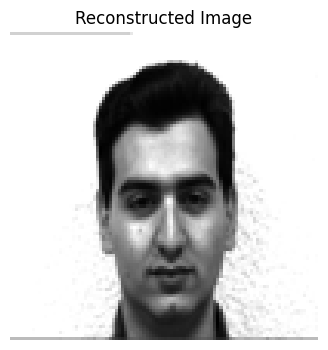

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(X_rs[14,5,:,:], cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image')
plt.show()


In [81]:
eps = 0.1
delta = eps*np.sqrt(np.sum(X_rs.astype(np.float64)**2))/np.sqrt(3)
C = X_rs
r = 1
G = []
for k in range(0,3):

    C = C.reshape(X_rs.shape[k]*r,-1)
    U, S, V = np.linalg.svd(C,full_matrices=False)
    G.append(U.reshape(r,X_rs.shape[k],-1))
    C = np.diag(S) @ V
    r=r*X_rs.shape[k]

G1=G[0]
G2=G[1]
G3=G[2]
G4=C.reshape(C.shape[0],C.shape[1],1)



In [82]:
len(G)

3

IndexError: list index out of range

In [66]:
G1=G[0]
G2=G[1]
G3=G[2]

In [83]:
print(G1.shape)
print(G2.shape)
print(G3.shape)
print(G4.shape)

(1, 15, 15)
(15, 11, 165)
(165, 100, 100)
(100, 100, 1)


In [86]:
X_rs[3,2,50,50] - G1[:,3,:] @ G2[:,2,:] @ G3[:,50,:] @ G4[:,50,:]

array([[0.]], dtype=float32)